In [7]:
import glob
from pickle import load
trainings = list()
filelist = list(glob.glob('results*.pickle'))
for file in filelist:
    trainings.append(load(open(file, 'rb')))
    
trainings = trainings[:2]

0.6735529297590255 0.7529891312122345
[{'channels': 14, 'depth': 1, 'dim': 64, 'dim_head': 32, 'dropout': 0.2, 'emb_dropout': 0, 'heads': 8, 'image_size': (1, 300), 'mlp_dim': 128, 'num_classes': 8, 'patch_size': (1, 10), 'pool': 'cls', 'pretrained': '../vit_dim64_h8_2_1_epoch20.pth', 'sessions': 5, 'subjects': 3, 'training_config': {'epochs': 20, 'batch_size': 64, 'optim': 'SGD', 'optim_hparams': {'lr': 0.0001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0}, 'lr_scheduler': 'MultiStepLR', 'lr_scheduler_hparams': {'milestones': [10, 20], 'gamma': 0.1}}, 'use_cls_token': True}, {'channels': 14, 'depth': 1, 'dim': 64, 'dim_head': 32, 'dropout': 0.2, 'emb_dropout': 0, 'heads': 8, 'image_size': (1, 300), 'mlp_dim': 128, 'num_classes': 8, 'patch_size': (1, 10), 'pool': 'cls', 'pretrained': '../vit_dim64_h8_1_1_epoch20.pth', 'sessions': 5, 'subjects': 2, 'training_config': {'epochs': 20, 'batch_size': 64, 'optim': 'SGD', 'optim_hparams': {'lr': 0.0001, 'momentum': 0.9, 'dampening': 0, '

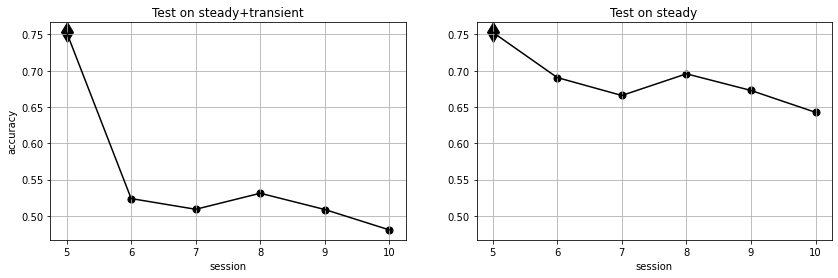

In [8]:
# Problemi:
# - preso modello ultima epoca e non il migliore
# - val acc calcolata sempre su steady e non anche su non steady
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", ["#000000", '#000000'])
fix, (ax1, ax2) = plt.subplots(figsize=(14, 4), ncols=2)
ax1.grid(True)
ax2.grid(True)
ax1.set_title("Test on steady+transient")
ax2.set_title("Test on steady")

for n_idx, (config, results) in enumerate(trainings):
    
    acccs = []
    acccs_steady = []
    for r in results:

        accs = np.array([0] * len(r['test_sessions']), dtype=float)
        for i, (y_pred, y_true) in enumerate(zip(r['val-fold_0']['y_preds'], r['val-fold_0']['y_trues'])):
            accs[i] += (y_pred == y_true).sum().float() / len(y_true)
        for i, (y_pred, y_true) in enumerate(zip(r['val-fold_1']['y_preds'], r['val-fold_1']['y_trues'])):
            accs[i] += (y_pred == y_true).sum().float() / len(y_true)
        accs /= 2

        accs_steady = np.array([0] * len(r['test_sessions']), dtype=float)
        for i, (y_pred, y_true) in enumerate(zip(r['val-fold_0']['y_preds_steady'], r['val-fold_0']['y_trues_steady'])):
            accs_steady[i] += (y_pred == y_true).sum().float() / len(y_true)
        for i, (y_pred, y_true) in enumerate(zip(r['val-fold_1']['y_preds_steady'], r['val-fold_1']['y_trues_steady'])):
            accs_steady[i] += (y_pred == y_true).sum().float() / len(y_true)
        accs_steady /= 2

        acc_val = .5 * r['val-fold_0']['losses_accs'][-1]['val_acc'] + .5 * r['val-fold_1']['losses_accs'][-1]['val_acc']

        y = [acc_val] + [a for a in accs]
        acccs.append(y)

        y = [acc_val] + [a for a in accs_steady]
        acccs_steady.append(y)

    acccs = np.array(acccs).mean(axis=0)
    acccs_steady = np.array(acccs_steady).mean(axis=0)

    x = [r['test_sessions'][0]] + [a for a in np.array(r['test_sessions']) + 1]
    y1 = [a for a in acccs]
    y2 = [a for a in acccs_steady]
    m = ['d'] + (['o'] * (len(x) - 1))
    s = [200] + [50] * (len(x) - 1)
    
    ax1.plot(x, y1, color=f'C{n_idx}')
    for xp, yp, m_, s_ in zip(x, y1, m, s):
        ax1.scatter([xp],[float(yp)], marker=m_, s=s_, color=f'C{n_idx}')
    
    ax2.plot(x, y2, color=f'C{n_idx}')
    for xp, yp, m_, s_ in zip(x, y2, m, s):
        ax2.scatter([xp],[float(yp)], marker=m_, s=s_, color=f'C{n_idx}')

(min1, max1), (min2, max2) = ax1.get_ylim(), ax2.get_ylim()
min_ = min(min1, min2)
max_ = max(max1, max2)
ax1.set_ylim((min_, max_))
ax2.set_ylim((min_, max_))

ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax1.set_xlabel("session")
ax2.set_xlabel("session")
ax1.set_ylabel("accuracy")

print(np.array(acccs_steady)[1:].mean(), acccs_steady[0])
print(config)
plt.show()


0.7658825278282165


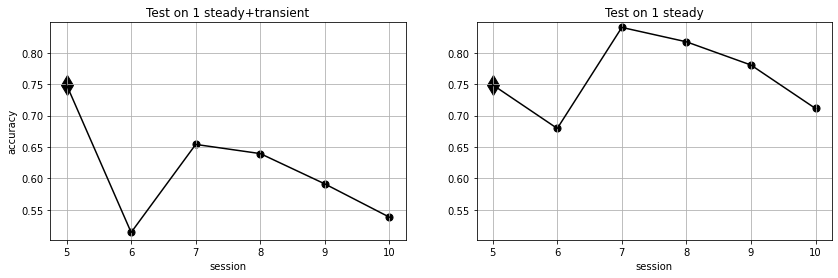

0.6484565377235413


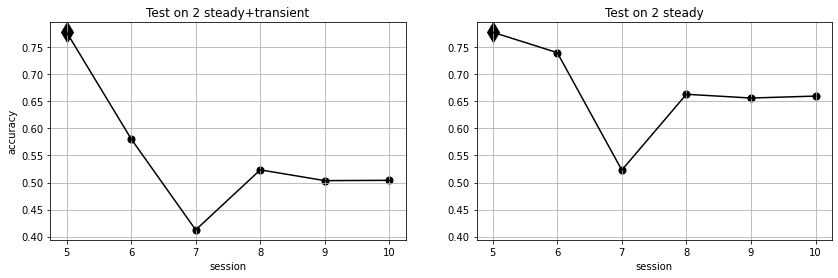

0.6463752448558807


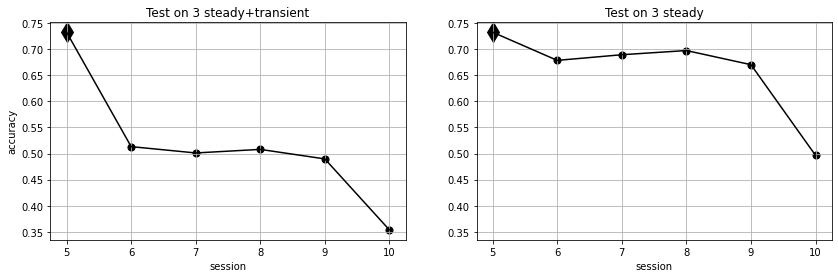

0.6840741157531738


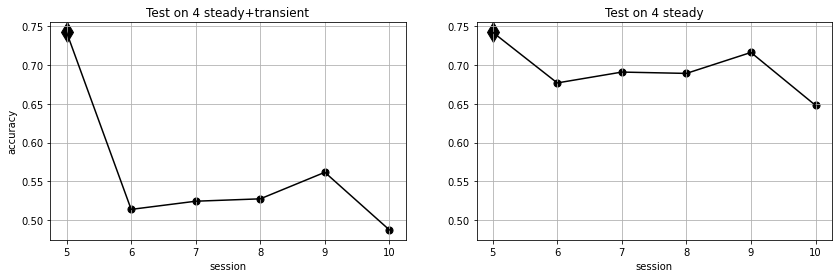

0.8383667945861817


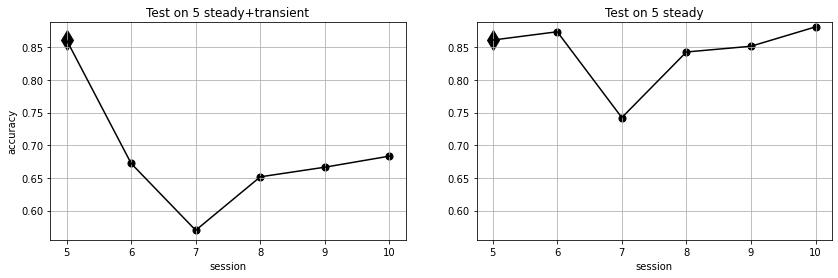

0.6887310385704041


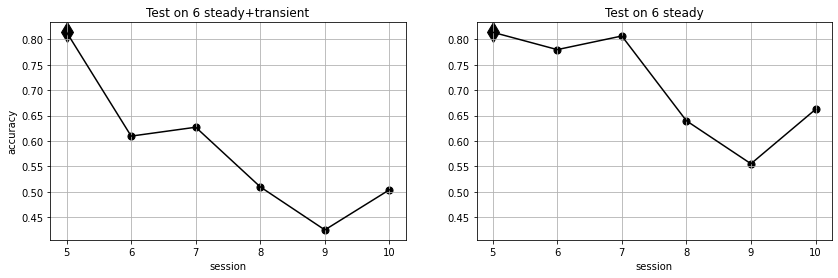

0.6566613554954529


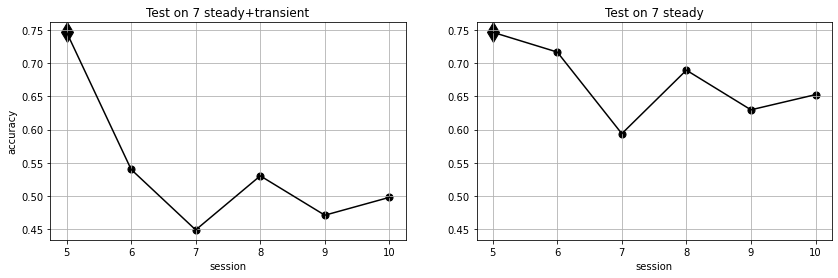

0.6110518097877502


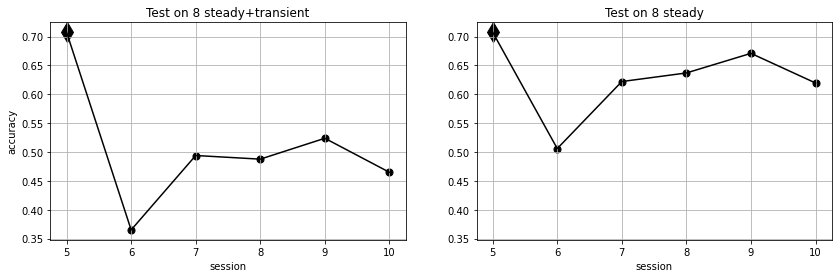

0.5630885124206543


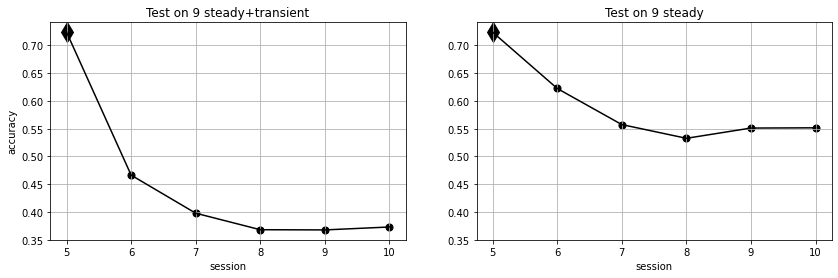

0.6328413605690002


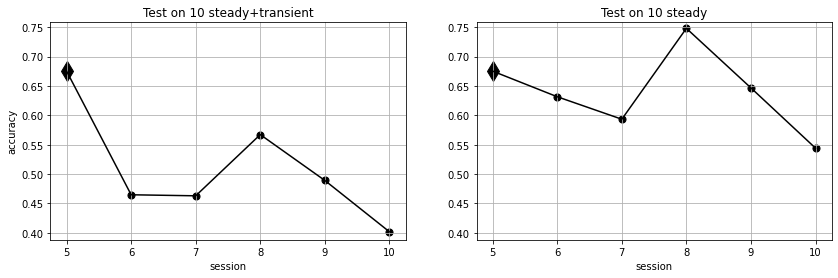

In [3]:
for subject in range(1, 11):
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", ["#000000", '#000000'])
    fix, (ax1, ax2) = plt.subplots(figsize=(14, 4), ncols=2)
    ax1.grid(True)
    ax2.grid(True)
    ax1.set_title(f"Test on {subject} steady+transient")
    ax2.set_title(f"Test on {subject} steady")
    for n_idx, (config, results) in enumerate(trainings):

        acccs = []
        acccs_steady = []
        for r in results:
            
            if r['subject'] != subject:
                continue

            accs = np.array([0] * len(r['test_sessions']), dtype=float)
            for i, (y_pred, y_true) in enumerate(zip(r['val-fold_0']['y_preds'], r['val-fold_0']['y_trues'])):
                accs[i] += (y_pred == y_true).sum().float() / len(y_true)
            for i, (y_pred, y_true) in enumerate(zip(r['val-fold_1']['y_preds'], r['val-fold_1']['y_trues'])):
                accs[i] += (y_pred == y_true).sum().float() / len(y_true)
            accs /= 2

            accs_steady = np.array([0] * len(r['test_sessions']), dtype=float)
            for i, (y_pred, y_true) in enumerate(zip(r['val-fold_0']['y_preds_steady'], r['val-fold_0']['y_trues_steady'])):
                accs_steady[i] += (y_pred == y_true).sum().float() / len(y_true)
            for i, (y_pred, y_true) in enumerate(zip(r['val-fold_1']['y_preds_steady'], r['val-fold_1']['y_trues_steady'])):
                accs_steady[i] += (y_pred == y_true).sum().float() / len(y_true)
            accs_steady /= 2

            acc_val = .5 * r['val-fold_0']['losses_accs'][-1]['val_acc'] + .5 * r['val-fold_1']['losses_accs'][-1]['val_acc']

            y = [acc_val] + [a for a in accs]
            acccs.append(y)

            y = [acc_val] + [a for a in accs_steady]
            acccs_steady.append(y)
            
            print(np.array(y)[1:].mean())

        acccs = np.array(acccs).mean(axis=0)
        acccs_steady = np.array(acccs_steady).mean(axis=0)

        x = [r['test_sessions'][0]] + [a for a in np.array(r['test_sessions']) + 1]
        y1 = [a for a in acccs]
        y2 = [a for a in acccs_steady]
        m = ['d'] + (['o'] * (len(x) - 1))
        s = [200] + [50] * (len(x) - 1)

        ax1.plot(x, y1, color=f'C{n_idx}')
        for xp, yp, m_, s_ in zip(x, y1, m, s):
            ax1.scatter([xp],[float(yp)], marker=m_, s=s_, color=f'C{n_idx}')

        ax2.plot(x, y2, color=f'C{n_idx}')
        for xp, yp, m_, s_ in zip(x, y2, m, s):
            ax2.scatter([xp],[float(yp)], marker=m_, s=s_, color=f'C{n_idx}')

    (min1, max1), (min2, max2) = ax1.get_ylim(), ax2.get_ylim()
    min_ = min(min1, min2)
    max_ = max(max1, max2)
    ax1.set_ylim((min_, max_))
    ax2.set_ylim((min_, max_))

    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax1.set_xlabel("session")
    ax2.set_xlabel("session")
    ax1.set_ylabel("accuracy")

    plt.show()